<a href="https://colab.research.google.com/github/gzsomm/aprendizaje_profundo/blob/main/Proyecto_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
files.upload()  # Subí el archivo kaggle.json



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guzmansommer","key":"57c55d4dd1bf65b57e5d21e34ea990ef"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de la competencia (solo participantes registrados pueden acceder)
!kaggle competitions download -c dogs-vs-cats

# Descomprimir el zip
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip -d data/


In [12]:
import os
import shutil

source_folder = 'data/train'
cat_folder = os.path.join(source_folder, 'cats')
dog_folder = os.path.join(source_folder, 'dogs')

# Crear carpetas si no existen
os.makedirs(cat_folder, exist_ok=True)
os.makedirs(dog_folder, exist_ok=True)

# Mover solo archivos .jpg que no estén ya en las subcarpetas
for filename in os.listdir(source_folder):
    src_path = os.path.join(source_folder, filename)
    if os.path.isfile(src_path) and filename.endswith('.jpg'):
        if filename.startswith('cat'):
            shutil.move(src_path, os.path.join(cat_folder, filename))
        elif filename.startswith('dog'):
            shutil.move(src_path, os.path.join(dog_folder, filename))




In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'data/train'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


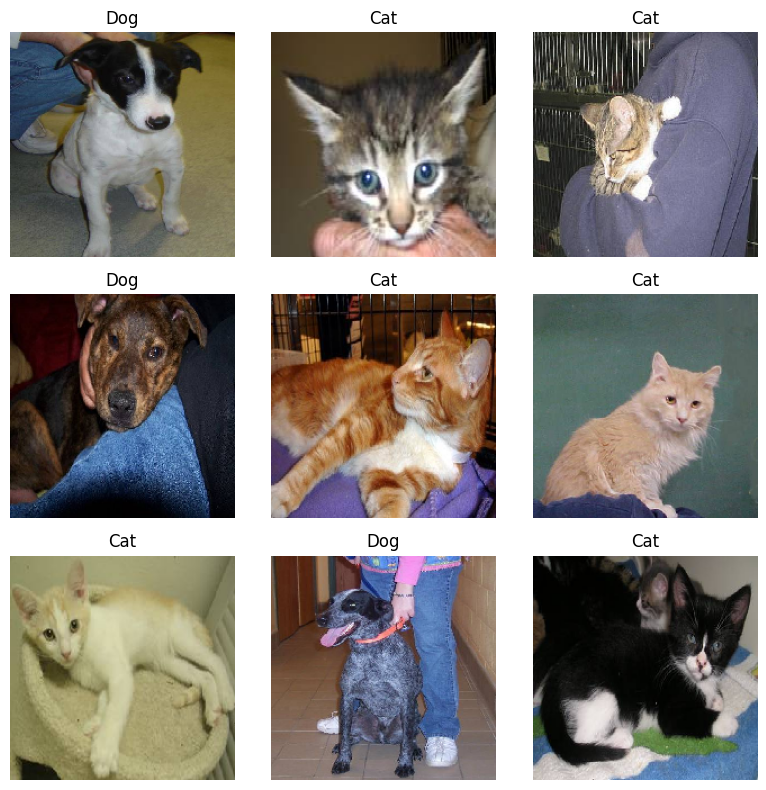

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar algunas imágenes del generador
images, labels = next(train_generator)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    label = 'Cat' if np.argmax(labels[i]) == 0 else 'Dog'
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Capas convolucionales y de pooling
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Capas densas
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=2, activation='softmax'))  # 2 clases: gato y perro

# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,005,762 (408.19 MB)

 Trainable params: 107,005,762 (408.19 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
train_generator  # conjunto de entrenamiento
val_generator  # conjunto de validación


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
# Entrenamiento
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=valid_generator
)


Epoch 1/2
  2/625 ━━━━━━━━━━━━━━━━━━━━ 8:50:00 51s/step - accuracy: 0.5469 - loss: 4.2835

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Crear los callbacks
early_stop = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True
)

# Volver a entrenar usando callbacks
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el mejor modelo
best_model = load_model('best_model.h5')

# Evaluación en el conjunto de validación
val_loss, val_accuracy = best_model.evaluate(valid_generator)
print(f"Precisión en validación: {val_accuracy:.2f}")


In [ ]:
# Guardar el modelo entrenado (estructura + pesos + optimizador)
best_model.save('modelo_perros_gatos_final.h5')
